# 第10回・12回　データ科学概観　レポート課題
<div style="text-align:right;">
    6930360317　鈴木羅己
</div>

## 課題1　Californiaデータセットの分析

In [21]:
import pandas as pd # pandas パッケージを読み込み
from sklearn.datasets import fetch_california_housing # fetch_california_housingモジュールを読み込み
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [7]:
california = fetch_california_housing() # fetch_california_housing関数を実⾏してその結果をcaliforniaに代⼊
df = pd.DataFrame(california.data, columns=california.feature_names) # 後述
df["MedHouseVal"] = california.target # MedHouseValという列にcalifornia.target（住宅価格）を代⼊
df # jupyterではセルの最後の⾏の値が出⼒されるためこう書いている

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


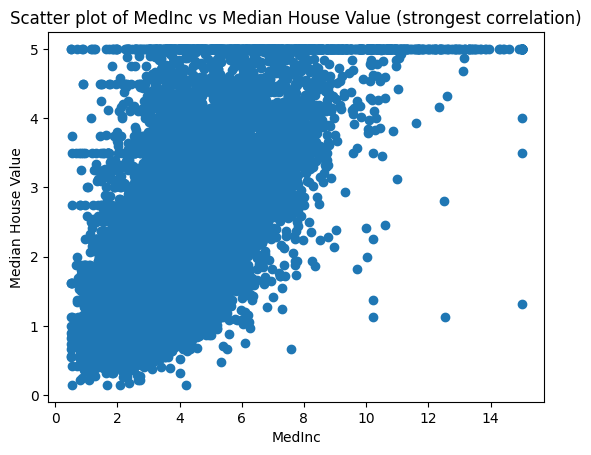

Feature: MedInc
Pearson correlation coefficient: 0.6880752079585468
-------------------------------------------------------------------------



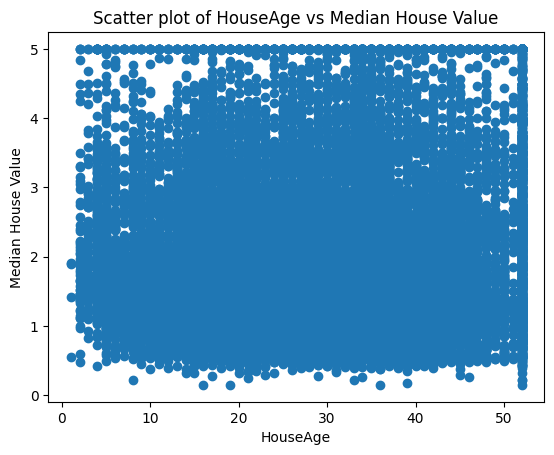

Feature: HouseAge
Pearson correlation coefficient: 0.10562341249320946
-------------------------------------------------------------------------



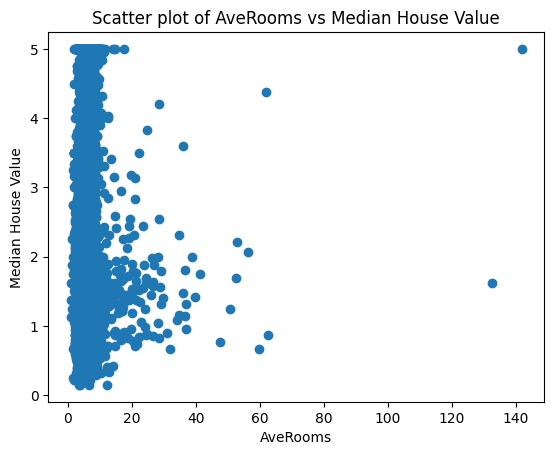

Feature: AveRooms
Pearson correlation coefficient: 0.1519482897414577
-------------------------------------------------------------------------



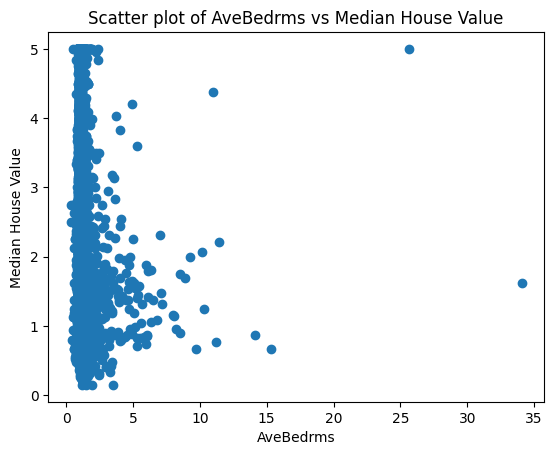

Feature: AveBedrms
Pearson correlation coefficient: -0.04670051296948674
-------------------------------------------------------------------------



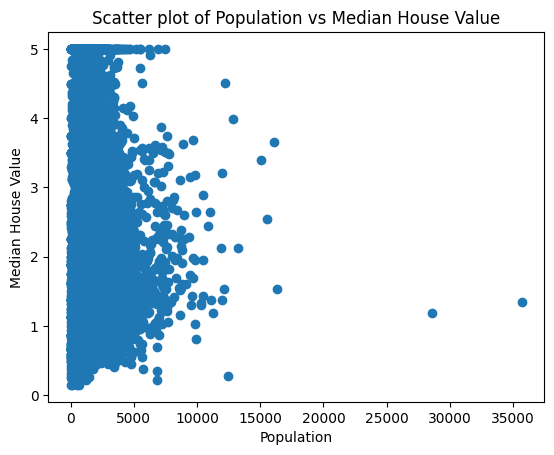

Feature: Population
Pearson correlation coefficient: -0.024649678888894907
-------------------------------------------------------------------------



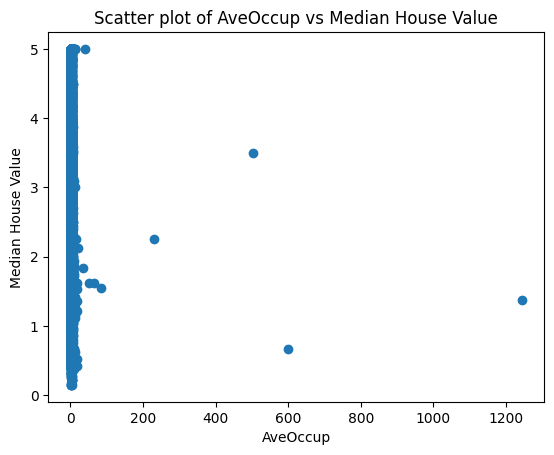

Feature: AveOccup
Pearson correlation coefficient: -0.0237374129561343
-------------------------------------------------------------------------



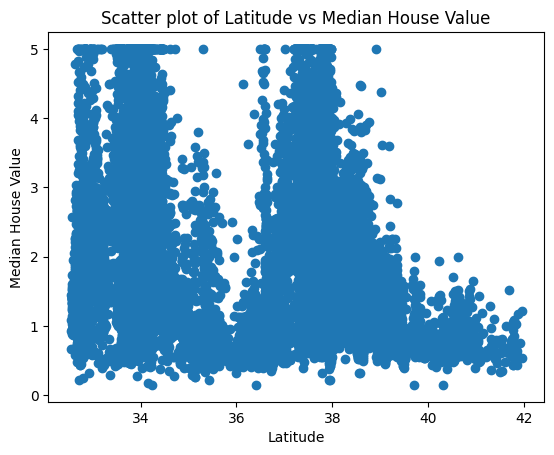

Feature: Latitude
Pearson correlation coefficient: -0.14416027687465818
-------------------------------------------------------------------------



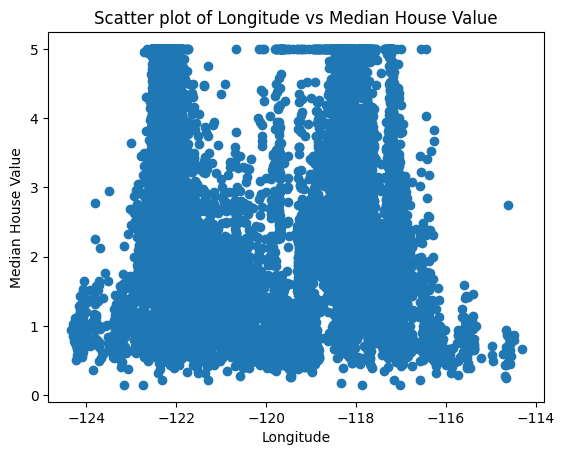

Feature: Longitude
Pearson correlation coefficient: -0.04596661511797831
-------------------------------------------------------------------------

Feature with the strongest correlation: MedInc
Pearson correlation coefficient: 0.6880752079585468


In [18]:
# 各特徴量とMedHouseValの相関係数を計算
features = df.columns[:-1] # MedHouseValを除く全ての特徴量
correlations = {}

for feature in features:
    r, p = stats.pearsonr(df[feature], df['MedHouseVal'])
    correlations[feature] = r

# 最も相関が強い特徴量を特定
max_corr_feature = max(correlations, key=correlations.get)
max_corr_value = correlations[max_corr_feature]

# 散布図と相関係数の表示
for feature in features:
    plt.scatter(df[feature], df['MedHouseVal'])
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    if feature == max_corr_feature:
        plt.title(f'Scatter plot of {feature} vs Median House Value (strongest correlation)')
    else:
        plt.title(f'Scatter plot of {feature} vs Median House Value')
    plt.show()
    
    r, p = correlations[feature], stats.pearsonr(df[feature], df['MedHouseVal'])[1]
    print(f"Feature: {feature}")
    print(f"Pearson correlation coefficient: {r}")
    print("-------------------------------------------------------------------------")
    print("")

# 最も相関が強い特徴量を強調表示
print(f"Feature with the strongest correlation: {max_corr_feature}")
print(f"Pearson correlation coefficient: {max_corr_value}")

## 考察
上記に各変数とMedHouseValとの相関係数を示す．最も高い相関を示すのはMedIncとの相関であり，その相関は0.6880...である．このことからMedHouseValとMedIncは正の相関関係があり，住宅価格が高い人は所得も高い傾向にあることがわかる．相関係数の値は0.7まで後0.02ほどであり，やや強い正の相関関係があると言える．散布図からわかるようにMedHouseValuが5.0のデータが多く見られる．このデータセットではおそらくMedHouseValが5.0以上のデータはすべてその値を5.0としてい可能性がある．そのため，MedHouseValが5.0以上のデータを除外する場合，または，データセット作成時にMedHouseValの値を丸めなかった場合には，相関関係の値が変わる可能性が考えられる．また，住宅価格が高いから頑張って所得を高めるのか，所得が高く余裕があるから住宅価格を高くするのか因果関係については明確ではないので，今後これらの因果関係について調べることが課題である．

## 課題2　標本の相関係数が従う確率分布

In [19]:
df = pd.read_csv("https://bit.ly/2TVx6nq") # インターネット経由で相関係数がほぼ0な⺟集団を読み込む

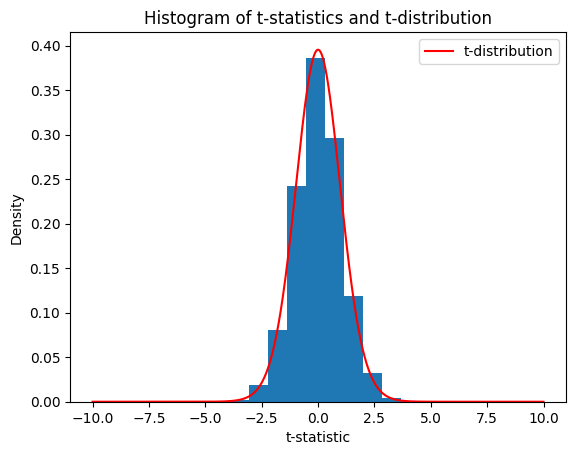

In [28]:
SAMPLE_NUM = 10000
n = 30
t_values = [] # t統計量を保存しておくための配列
for i in range(SAMPLE_NUM): # 以下をSAMPLE_NUM回繰り返すfor⽂
    sample = df.sample(n=n) # DataFrameからランダムにn個取り出す
    r, p = stats.pearsonr(sample.x, sample.y) # ランダムに抽出された標本において列xと列yの相関係数を測る
    t = r * np.sqrt(n-2) / np.sqrt(1 - r ** 2) # t統計量を計算する
    t_values.append(t) # t統計量を配列に追加する
plt.hist(t_values, density=True) # 得られた SAMPLE_NUM 個のt統計量のヒストグラムを描画する．
plt.xlabel('t-statistic')
plt.ylabel('Density')
# t分布の描画
xs = np.arange(-10, 10, 0.001)
ys = stats.t.pdf(xs, df=n-2)
plt.plot(xs, ys, 'r', label='t-distribution')
# グラフの表示
plt.legend()
plt.title('Histogram of t-statistics and t-distribution')
plt.show()


# 考察
上記にシミュレーションの結果と自由度n-2のt分布の比較グラフを示す．グラフからt分布とシミュレーションのヒストグラムが概ね一致していることが確認できる．
